- Ridham
- Pal
- Subhan

- NAME THE PROJECT HEREe
  
- Intro of what is happening, what dataset we used.
  

<h1 style="color:darkblue;"><b>1.Import Libraries & Dataset Overview</b></h1>

In [15]:
#import nltk
nltk.download()

nltk.download('words')
nltk.download('punkt_tab')

NameError: name 'nltk' is not defined

In [17]:
# importing all the essential libs
import os
import pandas as pd
import numpy as np
import re
import string
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
#import nltk

#from nltk.corpus import stopwords
#from nltk.tokenize import word_tokenize
#from nltk.stem import WordNetLemmatizer

# all the sklearn libs
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


<h1 style="color:darkblue;"><b>2.Dataset Overview</b></h1>


In [18]:
# loading the dataset
file_path = './AI_Human.csv'
df = pd.read_csv(file_path)

# adding a quick overview of my dataset
print("Dataset Information:")
df.info()
df.head()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


  <h1 style="color:darkblue;"><b>3.Data Preprocessing</b></h1>


**Text Cleaning Functions**

Here, I added all our cleaning steps to improve our text quality:

In [20]:
# removing special tags
def remove_tags(text):
    tags = ['\n', '\'', '\"']
    for tag in tags:
        text = text.replace(tag, '')
    return text

# removing punctuation
def remove_punc(text):
    return ''.join([ch for ch in text if ch not in string.punctuation])

# converting to lowercase and remove extra spaces
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# removing stopwords
#nltk.download('stopwords')
#stop_words = set(stopwords.words('english'))

#def remove_stopwords(text):
    words = word_tokenize(text)
    return ' '.join([word for word in words if word not in stop_words])

# lemmatization
#nltk.download('wordnet')
#lemmatizer = WordNetLemmatizer()

#def lemmatize_text(text):
    words = word_tokenize(text)
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

## My text preprocessing steps

### 1. Removing Special Tags
**What This Does:**  
It removes unwanted symbols like newline characters (`\n`), single quotes (`'`), and double quotes (`"`) because these symbols don't carry important meaning in text analysis

**Example:**  
Input: `"Hello\nWorld"`  
Output: `HelloWorld`


### 2. Removing Punctuation
**What This Does:**  
This eliminates punctuation marks such as commas, periods and exclamation marks to simplify my text

**Example:**  
Input: `"Hello, World!"`  
Output: `Hello World`



### 3. Converting to Lowercase & Removing Extra Spaces
**What This Does:**  
This here converts all characters to lowercase and removes extra spaces between words or at the start and end of my text

**Example:**  
Input: `"  Hello    WORLD "`  
Output: `hello world`



### 4. Removing Stopwords
**What This Does:**  
Here we remove common words like **"the"**, **"is"**, and **"and"** that don't add much meaning to our text

**Example:**  
Input: `"The cat is running"`  
Output: `cat running`



### 5. Lemmatization
**What This Does:**  
Lastly this reduces words to their base or dictionary form- making words like **"running"** become **"run"**

**Example:**  
Input: `"The cats are running"`  
Output: `cat run`




**Note:** All these steps clean and simplify the text making it easier for me and for machine learning models to analyze and understand the core meaning without noise


Now I will apply all of these funcs to our dataset 

In [21]:
# appplying all my preprocessing functions
df['text'] = df['text'].apply(remove_tags)
df['text'] = df['text'].apply(remove_punc)
df['text'] = df['text'].apply(clean_text)
## df['text'] = df['text'].apply(remove_stopwords)
## df['text'] = df['text'].apply(lemmatize_text)

# sample of my cleaned text 
print("\nCleaned Text Sample:")
print(df['text'][0])



Cleaned Text Sample:
cars cars have been around since they became famous in the 1900s when henry ford created and built the first modelt cars have played a major role in our every day lives since then but now people are starting to question if limiting car usage would be a good thing to me limiting the use of cars might be a good thing to doin like matter of this article in german suburb life goes on without cars by elizabeth rosenthal states how automobiles are the linchpin of suburbs where middle class families from either shanghai or chicago tend to make their homes experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe passenger cars are responsible for 12 percent of greenhouse gas emissions in europeand up to 50 percent in some carintensive areas in the united states cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go article paris

**NOTE:** I couldn’t apply all of these functions (I commenetd them) because some of them took too long during preprocessing which slowed down my entire code execution. Functions like <u>lemmatization </u> and <u>stopword removal</u> require tokenizing text and performing word lookups making them computationally expensive. Since I was working on a large dataset, running all functions together would take a lot of processing power and time. If you have a fast GPU (Graphics Processing Unit), your system probably can handle these tasks much faster because faster GPUs are optimized for parallel processing allowing multiple computations at the same time. If you have a powerful machine, you can try using both the functions I commented on your system for better text cleaning/improved model accuracy

<h1 style="color:darkblue;"><b>4.Visualizations</b></h1>


**1. Class Distribution**

In [10]:
pip3 i sns

SyntaxError: invalid syntax (3552516498.py, line 1)

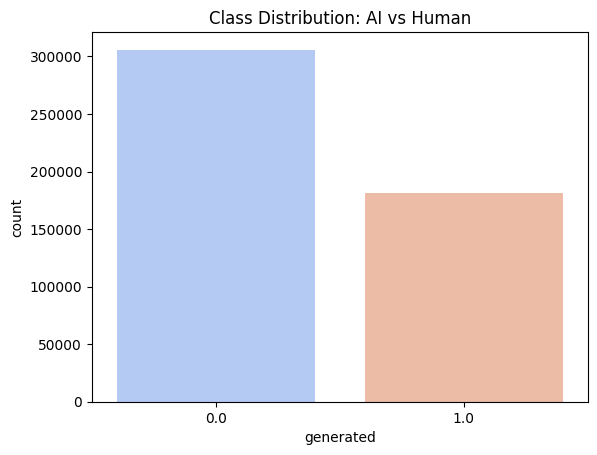

In [22]:
# Class distribution
sns.countplot(x='generated', data=df, hue='generated', palette='coolwarm', legend=False)
plt.title("Class Distribution: AI vs Human")
plt.show()


In [23]:
# I am counting total texts in the data
total_texts = len(df['generated'])
print('Total Texts:', total_texts)

# human-written texts
human_texts = df['generated'].value_counts()[0.0]
print('Human Written Texts:', human_texts)

# AI gener texts
ai_texts = df['generated'].value_counts()[1.0]
print('AI Generated Texts:', ai_texts)

Total Texts: 487235
Human Written Texts: 305797
AI Generated Texts: 181438


**2. Word Count Distribution**

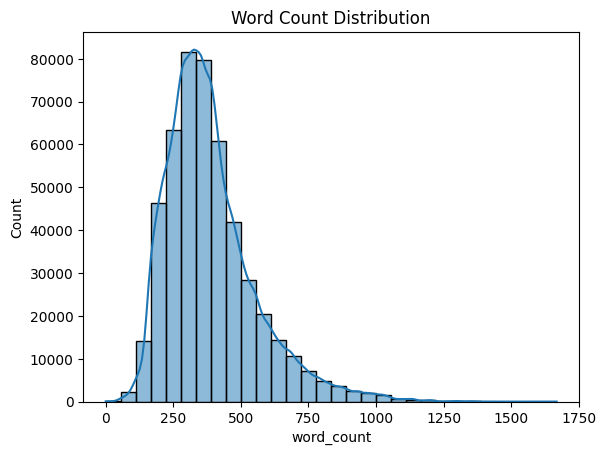

In [24]:
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.show()

**3. Most Common Words**

/var/folders/cr/fgj1sf693_5grl6zw2m9ggrh0000gn/T/ipykernel_21045/4015879884.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_words, x="Frequency", y="Word", palette='viridis')


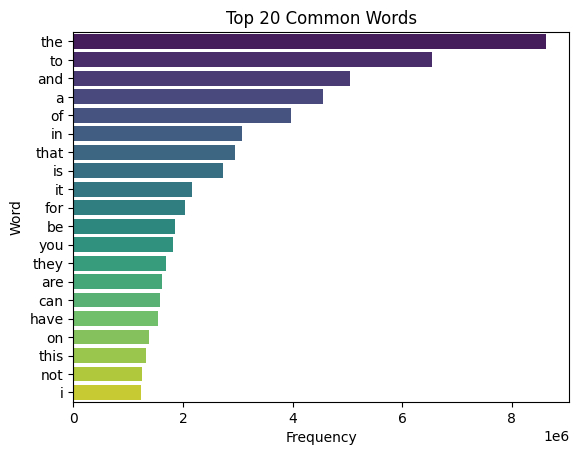

In [25]:
from collections import Counter
word_list = ' '.join(df['text']).split()
word_freq = Counter(word_list)

common_words = pd.DataFrame(word_freq.most_common(20), columns=["Word", "Frequency"])
sns.barplot(data=common_words, x="Frequency", y="Word", palette='viridis')
plt.title("Top 20 Common Words")
plt.show()

**4. Text Length Distribution**

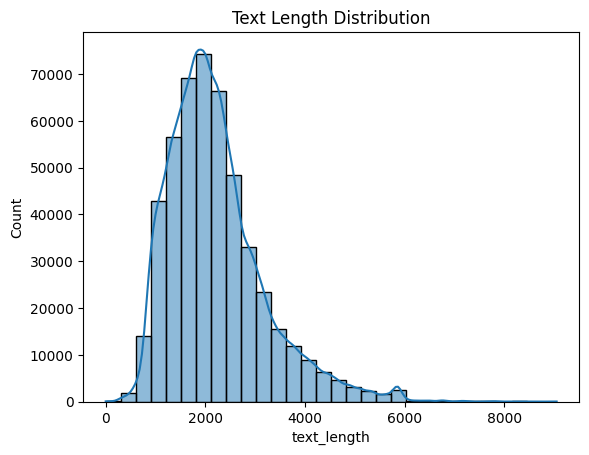

In [26]:
df['text_length'] = df['text'].apply(len)
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Text Length Distribution")
plt.show()


**5. Correlation Heatmap**

In [27]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'cars cars have been around since they became famous in the 1900s when henry ford created and built the first modelt cars have played a major role in our every day lives since then but now people are starting to question if limiting car usage would be a good thing to me limiting the use of cars might be a good thing to doin like matter of this article in german suburb life goes on without cars by elizabeth rosenthal states how automobiles are the linchpin of suburbs where middle class families from either shanghai or chicago tend to make their homes experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe passenger cars are responsible for 12 percent of greenhouse gas emissions in europeand up to 50 percent in some carintensive areas in the united states cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to go article paris bans driving due to smog by robert duffer says how paris after days of nearrecord pollution enforced a partial driving ban to clear the air of the global city it also says how on monday motorist with evennumbered license plates were ordered to leave their cars at home or be fined a 22euro fine 31 the same order would be applied to oddnumbered plates the following day cars are the reason for polluting entire cities like paris this shows how bad cars can be because of all the pollution that they can cause to an entire citylikewise in the article carfree day is spinning into a big hit in bogota by andrew selsky says how programs thats set to spread to other countries millions of columbians hiked biked skated or took the bus to work during a carfree day leaving streets of this capital city eerily devoid of traffic jams it was the third straight year cars have been banned with only buses and taxis permitted for the day without cars in the capital city of 7 million people like the idea of having carfree days because it allows them to lesson the pollution that cars put out of their exhaust from people driving all the time the article also tells how parks and sports centers have bustled throughout the city uneven pitted sidewalks have been replaced by broad smooth sidewalks rushhour restrictions have dramatically cut traffic and new restaurants and upscale shopping districts have cropped up having no cars has been good for the country of columbia because it has aloud them to repair things that have needed repairs for a long time traffic jams have gone down and restaurants and shopping districts have popped up all due to the fact of having less cars aroundin conclusion the use of less cars and having carfree days have had a big impact on the environment of cities because it is cutting down the air pollution that the cars have majorly polluted it has aloud countries like columbia to repair sidewalks and cut down traffic jams limiting the use of cars would be a good thing for america so we should limit the use of cars by maybe riding a bike or maybe walking somewhere that isnt that far from you and doesnt need the use of a car to get you there to me limiting the use of cars might be a good thing to do'

<Figure size 800x600 with 0 Axes>

  <h1 style="color:darkblue;"><b>5.Splitting the Dataset</b></h1>


In [28]:
X = df['text']
y = df['generated']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training Set Size:", len(X_train))
print("Testing Set Size:", len(X_test))

Training Set Size: 341064
Testing Set Size: 146171


### Why I used a 70-30 Split?

A 70-30 split is commonly used in machine learning because it balances model training and evaluation. In my dataset here, there are **487,235 entries**, meaning **70% (about 341,065 samples)** will be used for training, and **30% (about 146,170 samples)** will be used for testing. Training on 70% of the data ensures the model learns patterns effectively while the remaining 30% allows us to check how well it performs on unseen data. This helps prevent overfitting, where the model memorizes the training data but fails on new data. The dataset is large enough that even 30% I feel will provide a strong solif evaluation set


<h1 style="color:darkblue;"><b>6. Model Building</b></h1>


**1-Naive Bayes**

In [29]:
nb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', MultinomialNB())
])
nb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('model', MultinomialNB())])

**2- Logistic Regression**

In [30]:
lr_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', LogisticRegression(max_iter=1000))
])
lr_pipeline.fit(X_train, y_train)


Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression(max_iter=1000))])

**3- Gradient Boosting**

In [31]:
gb_pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('model', GradientBoostingClassifier(n_estimators=100))
])
gb_pipeline.fit(X_train, y_train)


KeyboardInterrupt: 

**4- XGBoost**

In [7]:
# from xgboost import XGBClassifier

# xgb_pipeline = Pipeline([
#     ('vectorizer', CountVectorizer()),
#     ('tfidf', TfidfTransformer()),
#     ('model', XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5))
# ])
# xgb_pipeline.fit(X_train, y_train)


# Neural Network

In [35]:
from sklearn.neural_network import MLPClassifier

# defining my the neural network pipelinee
nn_pipeline = Pipeline([
    ('count_vectorizer', CountVectorizer()),  # converting text to word count vectors - have explained these before
    ('tfidf_transformer', TfidfTransformer()),  # applying TF-IDF transformation
    ('mlp', MLPClassifier(
        hidden_layer_sizes=(128, 64, 32),  # more layers I added for deeper learning
        activation='relu',  # faster/more effective activation
        solver='adam',  # adaptive optimization
        alpha=0.0001,  # L2 regularization
        learning_rate='adaptive',  # adjusted learning rate dynamically
        max_iter=500,  # more iterations mean bettter convergence
        random_state=42  # ensuring reproducibility
    ))
])

# train the neural network model
nn_pipeline.fit(X_train, y_train)

/Users/ridha/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('tfidf_transformer', TfidfTransformer()),
                ('mlp',
                 MLPClassifier(hidden_layer_sizes=(128, 64, 32),
                               learning_rate='adaptive', max_iter=500,
                               random_state=42))])

### **Why these models? How do they predict AI vs human text?**

The models I chose to classify text as AI or human are based on word patterns, term importance and statistical relationships. They process text using **CountVectorizer** (to convert words into numbers) and **TF-IDF Transformer** (to weigh important words) before training on different classification models.

---

### **1. Naive Bayes (MultinomialNB)**
#### **Why this model?**
Naïve Bayes is **fast, efficient and well-suited for text classification** in general. It assumes each word in a text contributes independently to the classification so it makes it useful for tasks like spam detection and sentiment analysis

#### **How it predicts?**
- It **calculates probabilities** of words appearing in AI vs human-written texts I give it
- If a word is **more common in an ai generated text**, it assigns a higher probability to AI
- The final classification is based on the **highest probability**

#### **Pros**
pretty fast and works well with large datasets 
performs well even if there is limited training data

#### **Cons**

assumes word independence, which may not always be accurate  

#### **Example**
If words like "AI", "generated", and "algorithm" appear frequently in AI-written text the model will **classify a text as AI-generated if these words are present in high probability**

---

### **2. Logistic Regression**
#### **Why this model?**
Logistic Regression predicts **the probability of a text being AI-generated or human-written**. It’s interpretable, simple and effective for binary classifications.

#### **How it predicts?**
- It assigns weights to **each word** based on how strongly it indicates AI or human text
- The model calculates a probability **between 0 and 1** using a **sigmoid function**
- If the probability is **greater than 0.5**, the text is classified as **ai generated**

#### **Pros** 
simple to implement  
works well on structured datasets 

#### **Cons**
struggles with complex text patterns 

#### **Example**
If "GPT" and "neural network" have high weights- the model assigns a **higher probability to AI-generated text**

---

### **3. Gradient Boosting**
#### **Why this model?**
Gradient Boosting builds multiple small **decision trees** and learns from mistakes at each step. It captures deeper relationships between words and context. 

#### **How It Predicts?**
- The first tree makes an initial prediction
- The second tree **corrects mistakes** of the first tree
- This process continues making the model **more accurate with each and every step**

#### **Pros**
powerful for complex datasets
reduces errors step by step  

#### **Cons**
for sure slower training time compared to naive bayes and logistic reg

#### **Example**
If the first tree misclassifies "ChatGPT" as human-written, the next tree **adjusts the decision**, improving accuracy

---

### **4. XGBoost**
#### **Why this model?**
XGBoost is an optimized version of gradient boosting that runs faster and prevents overfitting. It’s widely used in text classification and fraud detection. I initially had three in mind, but later decided to include this one as well.

#### **How it predicts?**
- Like gradient boosting, it corrects mistakes iteratively
- It applies <u>regularization </u> to avoid overfitting on patterns that don’t generalize well

#### **Pros**
again fast and accurate for large datasets
handles complex text patterns


#### **Cons**
reequires careful tuning of hyperparameters

#### **Example**
If words like "AI-generated" appear but are not enough to confirm AI authorship, XGBoost **considers deeper text features before deciding**

---

**Note:** Again each model has strengths and testing multiple approaches helps <u>find the best classifier</u> for detecting ai generated text

<h1 style="color:darkblue;"><b>7. Model Evaluation</b></h1>


In [32]:
def evaluate_model(pipeline, name):
    y_pred = pipeline.predict(X_test)
    print(f"\n{name} Classification Report")
    print(classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred)

nb_acc = evaluate_model(nb_pipeline, "Naive Bayes")
lr_acc = evaluate_model(lr_pipeline, "Logistic Regression")
#gb_acc = evaluate_model(gb_pipeline, "Gradient Boosting")
## xgb_acc = evaluate_model(xgb_pipeline, "XGBoost")



Naive Bayes Classification Report
              precision    recall  f1-score   support

         0.0       0.93      0.99      0.96     91597
         1.0       0.99      0.87      0.93     54574

    accuracy                           0.95    146171
   macro avg       0.96      0.93      0.94    146171
weighted avg       0.95      0.95      0.95    146171


Logistic Regression Classification Report
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     91597
         1.0       0.99      0.99      0.99     54574

    accuracy                           0.99    146171
   macro avg       0.99      0.99      0.99    146171
weighted avg       0.99      0.99      0.99    146171



**Confusion Matrix**

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

for model, name in zip([nb_pipeline, lr_pipeline, gb_pipeline, xgb_pipeline], 
                       ['Naive Bayes', 'Logistic Regression', 'Gradient Boosting']):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()
    plt.title(f"{name} Confusion Matrix")
    plt.show()


<h1 style="color:darkblue;"><b> 8. Model Comparison </b></h1>


<h1 style="color:darkblue;"><b> 9.Save Models  </b></h1>


In [34]:
import joblib

# Save each trained model
joblib.dump(nb_pipeline, '../backend/models/naive_bayes_model.pkl')
joblib.dump(lr_pipeline, '../backend/models/logistic_regression_model.pkl')
#joblib.dump(gb_pipeline, '.. backend/models/gradient_boosting_model.pkl')
## joblib.dump(xgb_pipeline, 'models/xgboost_model.pkl')

print("All Models Saved Successfully in the '.. backend/models/' directory!")


All Models Saved Successfully in the '.. backend/models/' directory!


**Load Saved Models**

In [ ]:
# Load models from saved .pkl files
nb_model = joblib.load('.. backend/models/naive_bayes_model.pkl')
lr_model = joblib.load('.. backend/models/logistic_regression_model.pkl')
gb_model = joblib.load('.. backend/models/gradient_boosting_model.pkl')
## xgb_model = joblib.load('models/xgboost_model.pkl')

print("All Models Loaded Successfully!")


<h1 style="color:darkblue;"><b> 10. Final User Input  </b></h1>

In [ ]:
def predict_text(text, model):
    text = clean_text(text)
    pred = model.predict([text])[0]
    return "AI-generated 🤖" if pred == 1 else "Human-written 📝"

user_text = input("Enter text:")
result = predict_text(user_text, xgb_pipeline)
print(result)